In [1]:
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('history_cleaned.csv')
df.shape

(4778, 2)

In [3]:
df.head()

,Time,domain
0,2021-10-04 20:37:42,www.youtube.com
1,2021-10-04 20:26:53,www.youtube.com
2,2021-10-04 20:26:53,www.youtube.com
3,2021-10-04 20:25:51,www.google.com
4,2021-10-04 20:25:48,www.zawya.com


In [4]:
df.tail()

,Time,domain
4773,1600-12-31 19:00:00,www.cs.ucr.edu
4774,1600-12-31 19:00:00,drive.google.com
4775,1600-12-31 19:00:00,wiki.umbc.edu
4776,1600-12-31 19:00:00,uhs.umbc.edu
4777,1600-12-31 19:00:00,www.profellow.com


In [5]:
df.dtypes

Time      object
domain    object
dtype: object

In [6]:
# time column is string and string date is starting with YYYY, so I can do string compares
sum(df['Time'] < '1900') 

52

In [7]:
# I filter and get a copy, so I will not work on a slice, this will be a new dataframe. (essentially losing 1900 data points)
df = df[df.Time > '1900'].copy() 

In [8]:
df['Time'] = pd.to_datetime(df['Time'])

In [9]:
df['domain'].value_counts()[:50]

www.google.com                      744
colab.research.google.com           396
blackboard.umbc.edu                 360
github.com                          321
www.youtube.com                     185
webauth.umbc.edu                    182
mail.google.com                     140
www.fila.com                        100
www.instagram.com                    89
umbc.coursearc.com                   81
localhost:8888                       68
ereg.ets.org                         64
docs.google.com                      63
jigsaw.vitalsource.com               59
bookshelf.vitalsource.com            59
stackoverflow.com                    55
dramacool.fm                         40
www.viki.com                         38
my3.my.umbc.edu                      38
cgifederal.secure.force.com          38
umbc-csm.symplicity.com              36
my.umbc.edu                          32
www.qatarairways.com                 32
myretrievercare.umbc.edu             29
app.grammarly.com                    28


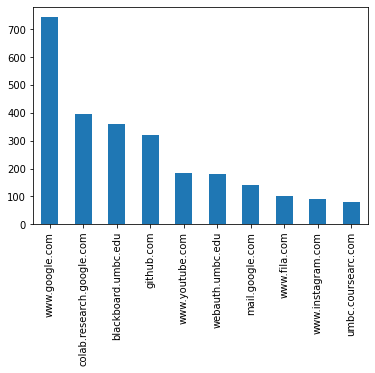

In [11]:
# top 10 sites that I visisted
df['domain'].value_counts()[:10].plot(kind='bar')

In [12]:
hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
hourly_counts

Time
0     164
1     256
2     133
3     120
4      89
5     232
6     185
7      92
8      98
9     206
10    197
11    234
12    343
13    150
14    217
15    190
16    218
17    206
18    258
19    342
20    374
21    310
22     77
23     35
Name: domain, dtype: int64

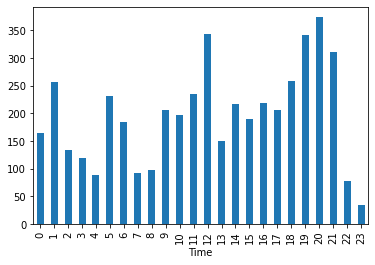

In [13]:
hourly_counts.plot.bar()

In [14]:
df['Day'] = [ d.day_name() for d in df['Time']]
df['DayIndex'] = [ d.dayofweek for d in df['Time']]
df.head()

,Time,domain,Day,DayIndex
0,2021-10-04 20:37:42,www.youtube.com,Monday,0
1,2021-10-04 20:26:53,www.youtube.com,Monday,0
2,2021-10-04 20:26:53,www.youtube.com,Monday,0
3,2021-10-04 20:25:51,www.google.com,Monday,0
4,2021-10-04 20:25:48,www.zawya.com,Monday,0


In [15]:
df['Day'].value_counts()

Tuesday      849
Monday       842
Wednesday    718
Saturday     669
Thursday     657
Sunday       652
Friday       339
Name: Day, dtype: int64

In [16]:
days_sorted = df['DayIndex'].value_counts().sort_index()
days_sorted

0    842
1    849
2    718
3    657
4    339
5    669
6    652
Name: DayIndex, dtype: int64

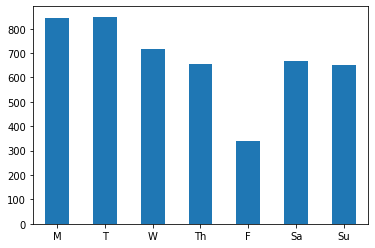

In [17]:
days_sorted.plot.bar()
plt.xticks(days_sorted.index, ['M', 'T', 'W','Th', 'F', 'Sa', 'Su'], rotation=0)

plt.show()

In [18]:
def is_weekend(day): 
    return day in ['Saturday', 'Sunday']


df['isWeekend'] = [ is_weekend(i) for i in df['Day']]
df.head()

,Time,domain,Day,DayIndex,isWeekend
0,2021-10-04 20:37:42,www.youtube.com,Monday,0,False
1,2021-10-04 20:26:53,www.youtube.com,Monday,0,False
2,2021-10-04 20:26:53,www.youtube.com,Monday,0,False
3,2021-10-04 20:25:51,www.google.com,Monday,0,False
4,2021-10-04 20:25:48,www.zawya.com,Monday,0,False


In [19]:
weekend = df[ df['isWeekend'] == True ]

weekday = df[ df['isWeekend'] == False ]

In [20]:
weekend.head()

,Time,domain,Day,DayIndex,isWeekend
119,2021-10-03 23:53:07,www.mozilla.org,Sunday,6,True
120,2021-10-03 23:53:00,www.google.com,Sunday,6,True
121,2021-10-03 22:53:14,localhost:8888,Sunday,6,True
122,2021-10-03 22:46:55,localhost:8888,Sunday,6,True
123,2021-10-03 22:44:09,github.com,Sunday,6,True


In [21]:
weekday['domain'].value_counts()[:5]

www.google.com               547
colab.research.google.com    291
blackboard.umbc.edu          265
github.com                   182
webauth.umbc.edu             141
Name: domain, dtype: int64

In [22]:
weekend['domain'].value_counts()[:5]

www.google.com               197
github.com                   139
www.youtube.com              106
colab.research.google.com    105
blackboard.umbc.edu           95
Name: domain, dtype: int64

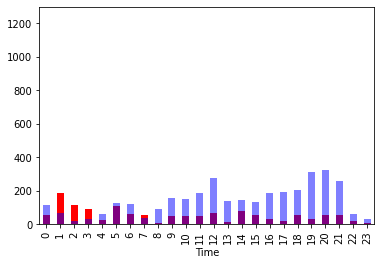

In [23]:
def show_stats(df, color, alpha=1):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
            
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha)
    plt.ylim([0, 1300])

    
show_stats(weekend, 'red', 1)
    
show_stats(weekday, 'blue', 0.5)

In [24]:
# be skeptical about your data!
# am I on computer a lot more on the weekdays 
# or it shows more simply becasue there are more weekdays 

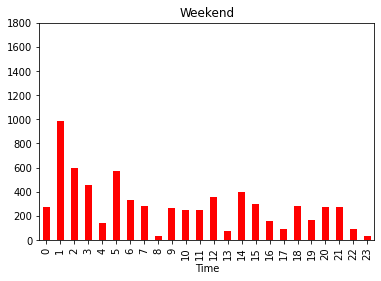

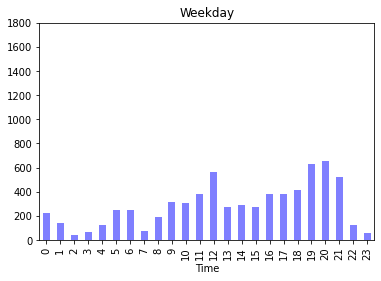

In [25]:
def show_stats(df, color, alpha=1, title='', y_lim = None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    days_counts = df.Time.dt.date.nunique()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
        else: 
            hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals
            
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha, title=title)
    
    if y_lim != None:
        plt.ylim(y_lim)
    plt.show()


    
y_lim=[0, 1800]
show_stats(weekend, 'red', 1, 'Weekend', y_lim=y_lim)
    
show_stats(weekday, 'blue', 0.5, 'Weekday', y_lim=y_lim)

In [26]:
df['domain'].value_counts()[:50]

www.google.com                      744
colab.research.google.com           396
blackboard.umbc.edu                 360
github.com                          321
www.youtube.com                     185
webauth.umbc.edu                    182
mail.google.com                     140
www.fila.com                        100
www.instagram.com                    89
umbc.coursearc.com                   81
localhost:8888                       68
ereg.ets.org                         64
docs.google.com                      63
jigsaw.vitalsource.com               59
bookshelf.vitalsource.com            59
stackoverflow.com                    55
dramacool.fm                         40
www.viki.com                         38
my3.my.umbc.edu                      38
cgifederal.secure.force.com          38
umbc-csm.symplicity.com              36
my.umbc.edu                          32
www.qatarairways.com                 32
myretrievercare.umbc.edu             29
app.grammarly.com                    28


In [27]:
df['domain'] = df['domain'].astype(str)

In [28]:
def get_data_for_domain(val):
    return df[ [True if val.lower() in i.lower() else False for i in df['domain'] ]]


def show_domain_stats(domain, color='blue', alpha=1):
    data = get_data_for_domain(domain)
    show_stats(data, color, alpha)
    return data

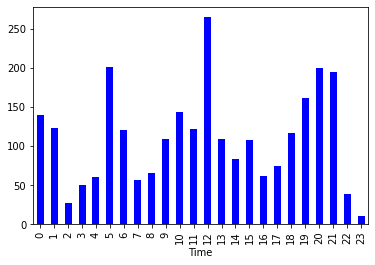

In [37]:
_= show_domain_stats('google', 'blue')

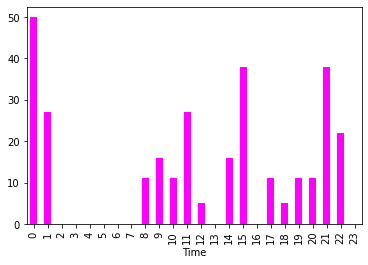

In [31]:
_ = show_domain_stats('stackover', 'magenta')


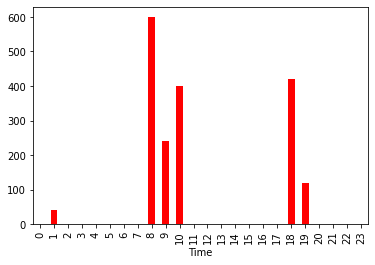

In [33]:
_ = show_domain_stats('instagram', 'red')

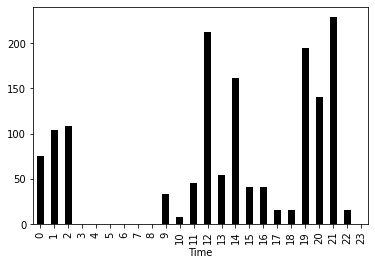

In [35]:
_=show_domain_stats('github', 'black')

### Based on data, what can we tell about this person?

1. Is this a work computer/personal computer?
2. Is he employed?
3. What is his interests?
4. Anything interesting?

1. This is personal computer
2. No, the user is not employed
3. The user browses everything using google and uses starkover flow to clear doubts for references. Uses social media for a while only.
4. The user is mostly active between the evening hours in the weekday and during weekend the user is active after 12'o clock.

### What do you think about this assignment? ( 3 sentences at most! )

The assignment is interesting and gives details about the history data of the user. The details are easy to understand about the interests and the activity of the user.

**NOTE**: If you give your permission for another student to analyze your history_cleaned.csv please commit it with this hw file.

(Your name will stay confidencial)

In [ ]:
system